Ejemplo para aclarar el rango de frecuencias de la transformada de Fourier usando np.fft.

Basado en la documentación oficial:
https://numpy.org/doc/stable/reference/routines.fft.html#implementation-details

*Algoritmo empleado: $$A_k=\sum_{m=0}^{n-1}a_m \exp \left( 2\pi i \frac{mk}{n}\right), \:k=0,1,2...n-1$$

*Interpretanción del arreglo A=signal.FFT(signal):

A[0] es el término de frecuencia cero.

A[1:n/2] contiene los términos de frecuencia positiva.

A[n/2+1:] contiene los términos de frecuencia negativa.

np.fft.fftshift(A) desplaza el arreglo de modo tal que la frecuencia cero quede en el centro del arreglo.






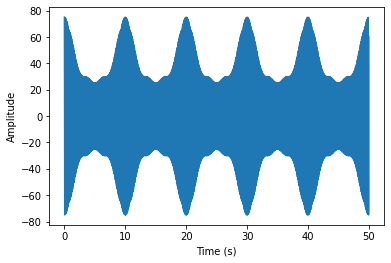

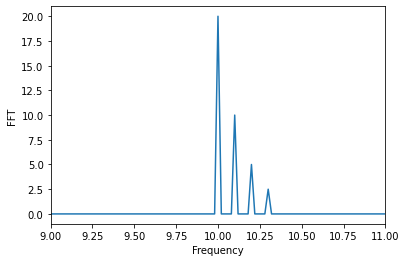

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
f1=10
f2=10.1
f3=10.2
f4=10.3
sample_freq=100 #Frecuencia de muestreo (Número de puntos o muestras de señal por unidad de tiempo)
dt=1/sample_freq #tiempo entre puntos de la señal.
t_start=0
t_end=50

time=np.arange(t_start,t_end,dt)
signal=40*np.cos(2*np.pi*f1*time)+20*np.cos(2*np.pi*f2*time)+10*np.cos(2*np.pi*f3*time)+5*np.cos(2*np.pi*f4*time)
plt.plot(time,signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

signalFFT=np.fft.fft(signal/len(signal))
signalFFT=signalFFT[range(int(len(signal)/2))]

indexes=np.arange(len(signalFFT))
time_duration=len(signal)/sample_freq
frequencies=indexes/time_duration
#Las frecuencias también se podrían hallar con
#frequencies=np.fft.fftfreq(len(signal),dt)
#frequencies=frequencies[range(int(len(signal)/2))]

plt.plot(frequencies,np.abs(signalFFT))
plt.xlim([9,11])
plt.xlabel("Frequency")
plt.ylabel("FFT")
plt.show()

Este ejemplo lo podemos repetir usando np.fft.rfft() y np.fft.rfftfreq,  el cual solo tiene en cuenta las frecuencias positivas, es decir, el intervalo (0,Nyquist_frequency).
Ver:
https://numpy.org/doc/stable/reference/routines.fft.html#real-and-hermitian-transforms


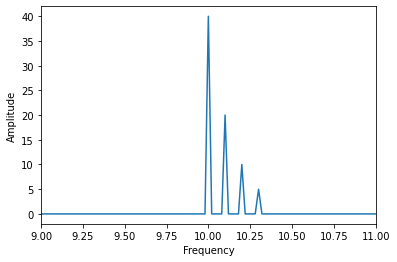

In [ ]:
signalFFT=np.fft.rfft(signal)
frequencies=np.fft.rfftfreq(len(signal),dt)
true_amplitude=2*np.abs(signalFFT)/(len(signal)) #Esta es la amplitud real de las funciones cosenoidales.
plt.plot(frequencies,true_amplitude)
plt.xlim([9,11])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

**Ejercicio:** Encontrar un método para entregar una lista con las posiciones de los máximos de amplitud.